# **SEGUNDO PARCIAL DE SIS420**

## Nombre: Gonzales Suyo Franz Reinaldo
## C.U. 35-5335
## Carrera: Ing. Sistemas

# Implementación del modelo Aprendizaje No Supervisado

En este ejercicio implementaremos el modelo con el Dataset.

Nuestro objetuvo aplicar el modelo de aprendizaje no supervisado con datos de dataset

En el siguiente dataset **Dry Bean Dataset (Conjunto de datos de frijoles secos)** `Dry_Bean_Dataset.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/tarndeepsingh16/dry-bean-dataset

Link del Repositorio de GitHub Segundo Parcial: 

## Información del Dataset:

## **1. Procesamiento de los Datos**

In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Obtenemos los datos
data = pd.read_csv('./Dry_Bean_Dataset.csv', delimiter=',')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
#Descartamos las columnas que tienen muchos datos perdidos o que no son muy necesarios para el analisis
data.drop(['Class'], axis=1, inplace=True)

In [7]:
# Información del dataset
print(data.info())

# Descripción estadística
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB
None
       

In [8]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


### Estandarizamos los datos para una distribución uniforme

Ajustamos las características de los datos para que tengan una distribución uniforme. Específicamente, StandardScaler es una técnica que estandariza las características de los datos restando la media y dividiendo por la desviación estándar.

In [9]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(data)

# Convertir los datos escalados de vuelta a un DataFrame
df = pd.DataFrame(scaled_data, columns=data.columns)

# Mostrar el DataFrame escalado
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440


In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Mostrar los datos escalados y divididos
# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 10888
Cantidad de ejemplos del 20% para la prueba es de: 2723


# **ML - Aprendizaje No Supervisado**

## **1. Selección del Modelo y Evaluación del Número de Clusters**

### 1.1 Encontrando el valor óptimo de clusters (K) - METODO DEL CODO

c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


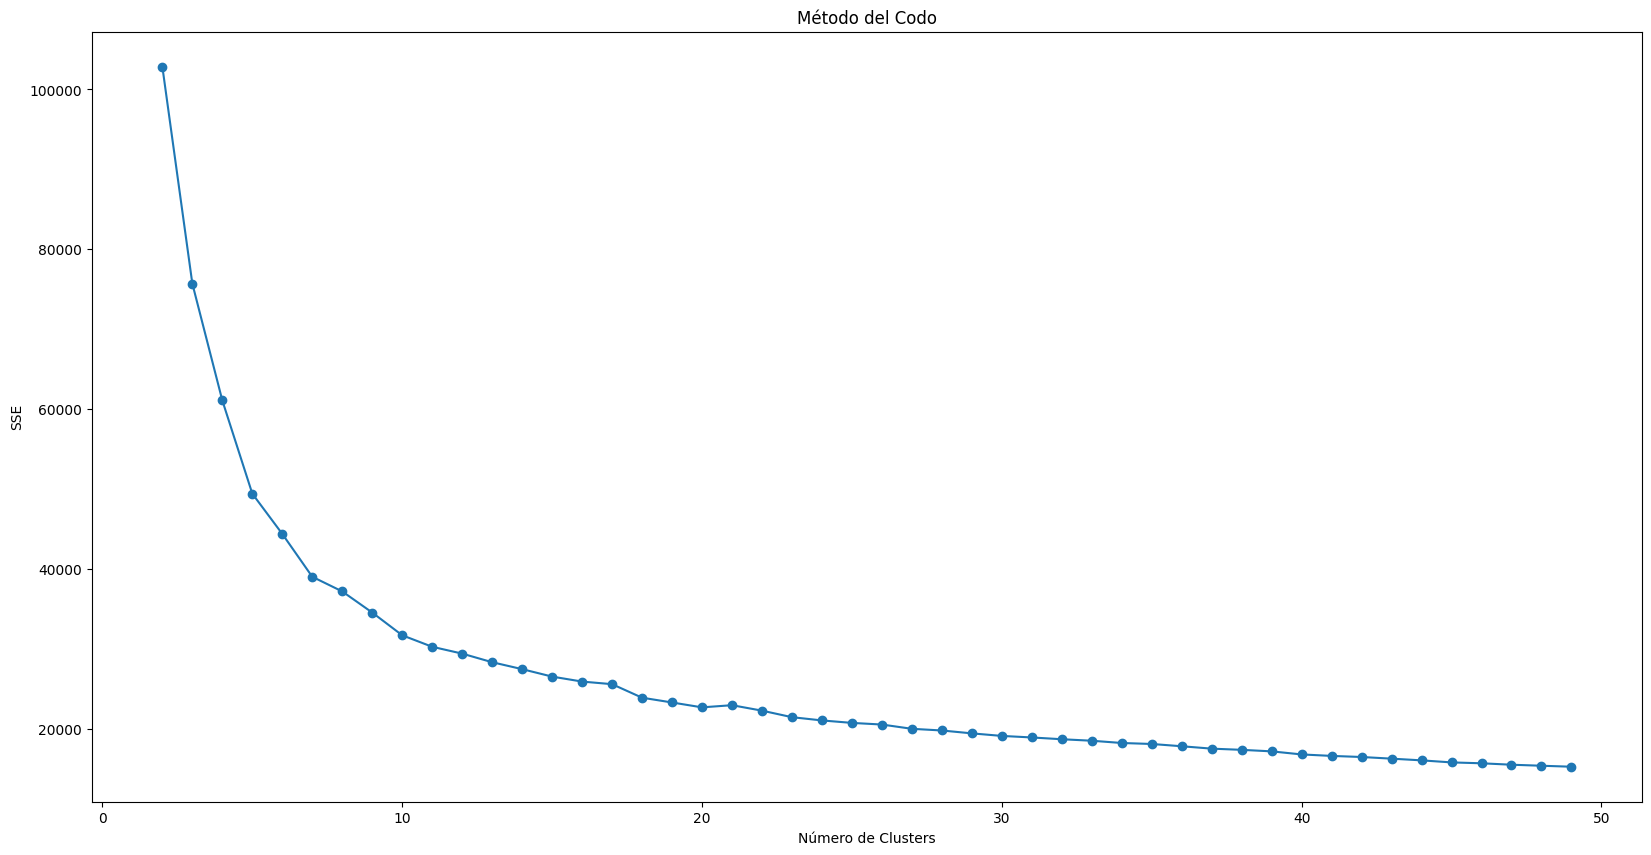

In [13]:
sse = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(20, 10))
plt.plot(range(2, 50), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

### 4.2 Encontrando el valor óptimo de clusters (K) - MÉTODO DE COEFICIENTE DE SILUETA

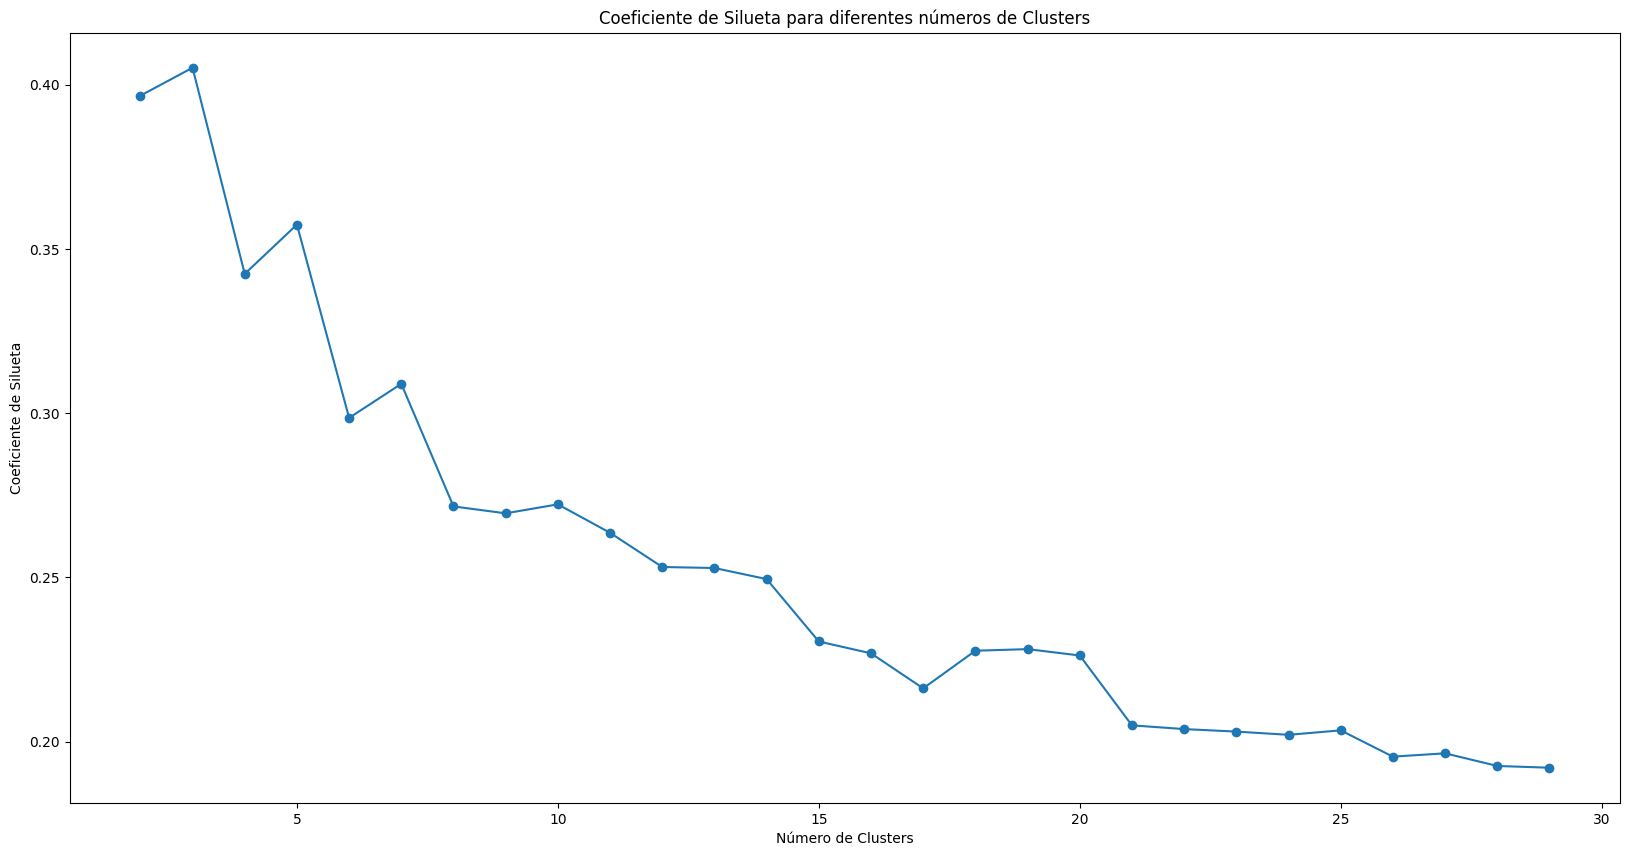

In [19]:
silhouette_scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(20, 10))
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

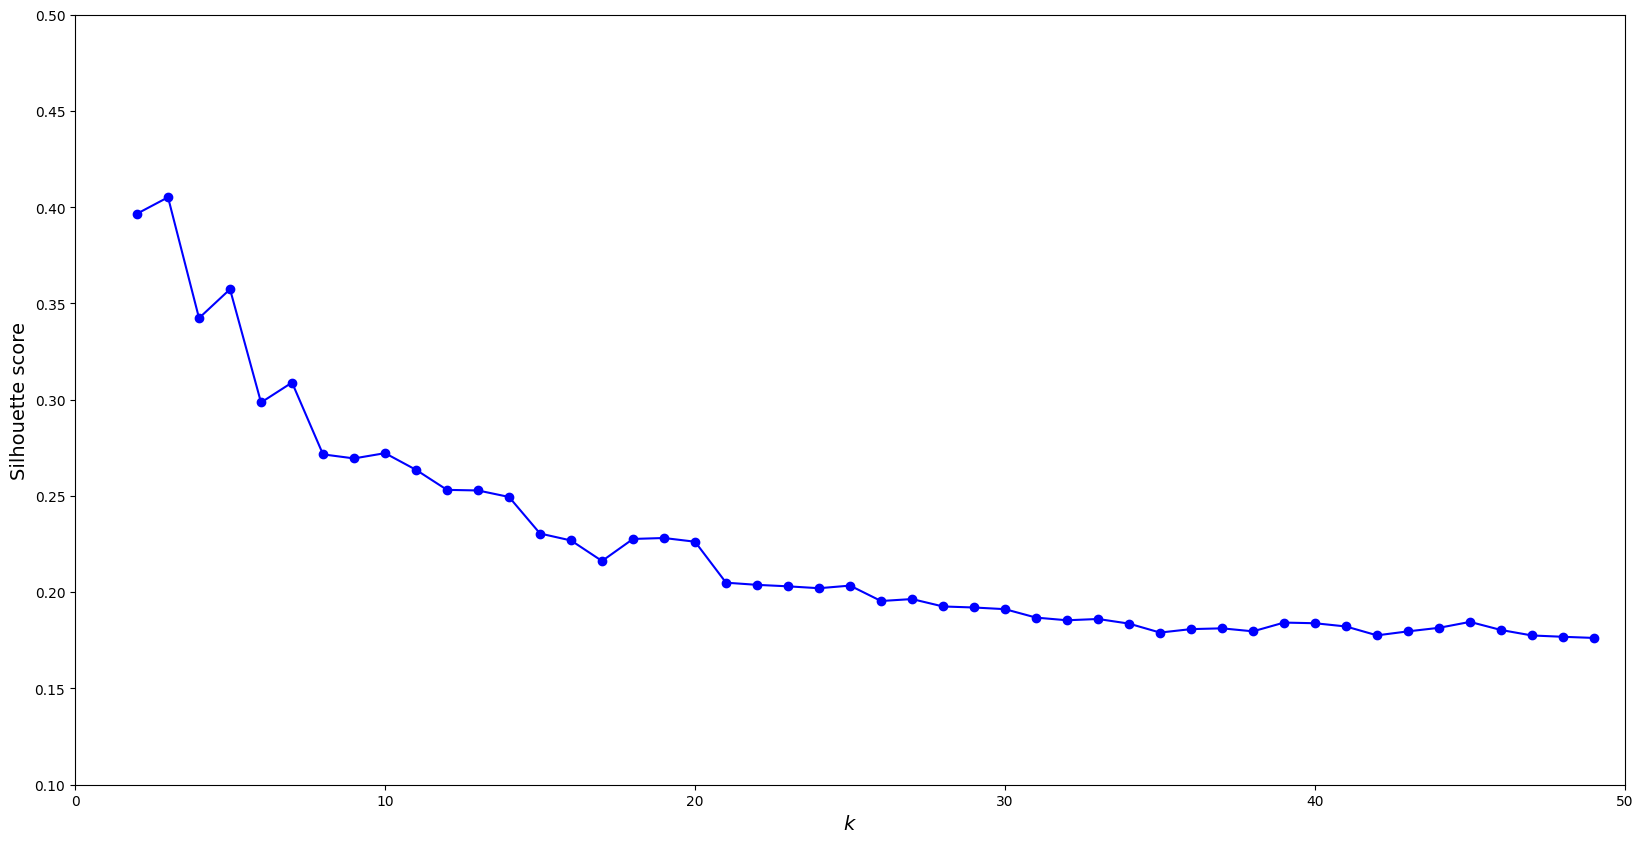

In [15]:
from sklearn.metrics import silhouette_score

# Creamos una lista de modelos de Means ajustados para diferentes números de clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1, 50)]

# Calculamos los coeficientes de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(20, 10))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecemos los límites de los ejes de X e Y para enfocar la visualización en un rango específico
plt.axis([0, 50, 0.1, 0.50])

plt.show()

In [16]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 3


In [21]:
# Mostramos todos los valores de la silueta
print(kmeans_per_k)

# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=11, random_state=42), KMeans(n_clusters=12, random_state=42), KMeans(n_clusters=13, random_state=42), KMeans(n_clusters=14, random_state=42), KMeans(n_clusters=15, random_state=42), KMeans(n_clusters=16, random_state=42), KMeans(n_clusters=17, random_state=42), KMeans(n_clusters=18, random_state=42), KMeans(n_clusters=19, random_state=42), KMeans(n_clusters=20, random_state=42), KMeans(n_clusters=21, random_state=42), KMeans(n_clusters=22, random_state=42), KMeans(n_clusters=23, random_state=42), KMeans(n_clusters=24, random_state=42), KMeans(n_clusters=25, random_state=42), KMeans(n_clusters=26, 

[0.39664089007703507,
 0.4051578867388047,
 0.34239259349284046,
 0.35740597880346553,
 0.29855966192446326,
 0.30892193377799704,
 0.27160885429929477,
 0.26950723125567033,
 0.272244467506197,
 0.2635799241452013,
 0.25316949179525566,
 0.25286087820783054,
 0.2494874076252354,
 0.2304922048318181,
 0.2268835197297268,
 0.21622235067690154,
 0.2276779048848332,
 0.22816581063068392,
 0.22623302015211313,
 0.2049600365164729,
 0.20382969154052893,
 0.20305948558721,
 0.20208037026963227,
 0.20343728820540527,
 0.19543517032458568,
 0.19644883009855227,
 0.19260058987510528,
 0.19206355690515017]

## **2. Aplicar K-Means con el Número de Clusters Elegido**

In [22]:
# Declaramos el valor de k óptimo
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X_train)

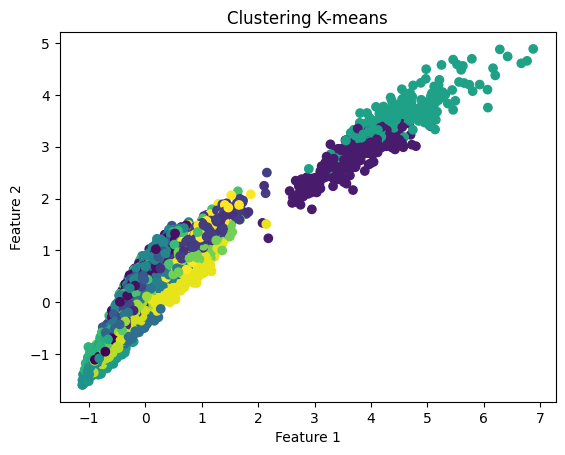

In [30]:
# Visualización de resultados (solo si hay 2 o 3 features)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering K-means')
plt.show()

In [23]:
# Mostramos el número de ejemplos en cada grupo
print(y_pred.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(y_pred)

(10888,)
[0 0 0 ... 1 0 1]


In [24]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(3, 16)
[[-0.53522242 -0.6595787  -0.70472973 -0.44054429 -0.6123935  -0.55989439
  -0.53725231 -0.60785641  0.18501717  0.36887836  0.68132743  0.61326861
   0.46517507  0.7474513   0.6073014   0.46711136]
 [ 0.34495571  0.58045098  0.662647    0.24135391  0.83531733  0.74669009
   0.34850084  0.48692826 -0.31831835 -0.50156723 -0.91951131 -0.82699135
  -0.37297087 -0.88329828 -0.81649511 -0.55928847]
 [ 4.08395901  3.39349441  3.1762318   3.80320853  0.01852197  0.2211875
   4.0752306   3.631583    0.55969234 -0.03125176 -0.15202712 -0.1259681
  -2.75816184 -1.46227004 -0.15389691 -0.72342885]]


In [25]:
# Añadir las etiquetas de los clusters al DataFrame original
X_train_df = X_train.copy()
X_train_df['Y-Cluster'] = y_pred

# Mostrar las etiquetas producidas
X_train_df["Y-Cluster"].value_counts()

Y-Cluster
0    6076
1    4405
2     407
Name: count, dtype: int64

In [26]:
# Mostramos el dataframe con la nueva columna de cluster
X_train_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Y-Cluster
11073,-0.817524,-1.021694,-0.992873,-0.983736,-0.388485,-0.115469,-0.815421,-1.025038,-1.145139,-0.253530,0.487464,0.302670,1.348256,0.877268,0.266894,0.348199,0
13172,-0.510087,-0.467130,-0.572571,-0.500656,-0.304938,-0.025888,-0.505551,-0.554955,-0.884498,-0.705127,-0.570721,0.203223,0.490243,0.329422,0.165784,0.053657,0
11587,-0.752968,-0.950881,-1.050026,-0.675291,-0.990520,-0.934051,-0.754025,-0.920861,-0.326866,0.367667,0.731095,1.018918,0.769951,1.382791,1.017593,0.348265,0
12492,-0.629515,-0.792687,-0.783520,-0.615128,-0.544398,-0.295991,-0.631535,-0.730156,0.704871,0.451385,0.872041,0.479779,0.665709,0.704703,0.448849,0.424005,0
430,-0.582965,-0.677568,-0.799163,-0.450447,-0.813247,-0.655593,-0.584010,-0.660857,0.913337,0.246218,0.382349,0.815423,0.386462,0.906017,0.800297,0.990959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.030512,1.224997,1.497611,0.788917,1.228794,1.054634,1.016389,1.225843,0.967838,0.807939,-0.601791,-1.196511,-1.043987,-1.330581,-1.176625,-0.170536,1
13418,-0.449861,-0.466169,-0.426161,-0.507908,-0.010367,0.256019,-0.451343,-0.469661,-1.173051,0.242246,0.075035,-0.090740,0.489755,0.052009,-0.128644,0.485566,0
5390,1.260297,1.406165,1.595202,1.113733,0.920507,0.898803,1.243435,1.444142,0.696877,0.901208,-0.467030,-0.953662,-1.319088,-1.295505,-0.954530,-0.235434,1
860,-0.498662,-0.671412,-0.857094,-0.082613,-1.381553,-1.711199,-0.502764,-0.538625,0.048110,0.696000,1.357839,1.567757,-0.127278,1.415513,1.619543,0.861651,0


## Evaluamos el Modelo

In [27]:
# Evaluar el modelo
silhouette_avg = silhouette_score(X_train, y_pred)
print(f'Coeficiente de Silueta: {silhouette_avg}')

Coeficiente de Silueta: 0.4051578867388047


## Realizamos algunas pruebas con nuevo datos

In [33]:
# Definir nuevas muestras para predecir sus clusters
X_new = np.array([
    [-0.365218,	-0.532278,	-0.699519,	0.111983,	-1.330113,	-1.592944,	-0.372549,	-0.352918,	0.437396,	1.064426,	1.597939,	1.498162,	-0.370573,	1.153692,	1.541930,	0.989265],
	[0.518320,	1.089549,	0.586132,	0.791512,	-0.106143,	0.169698,	0.550947,	0.704943,	0.365695,	-3.127637,	-2.516723,	-0.064090,	-1.007778,	-0.625351,	-0.102226,	-1.995235],
	[-0.518101,	-0.683994,	-0.836862,	-0.175910,	-1.236665,	-1.391983,	-0.521807,	-0.566452,	-0.103759,	0.648568,	1.240429,	1.358954,	-0.000975,	1.263821,	1.387803,	0.726306],
	[-0.678828,	-0.965544,	-1.139157,	-0.278714,	-1.663886,	-2.482813,	-0.684870,	-0.805076,	0.412487,	1.254524,	1.972582,	1.997703,	0.133443,	2.168059,	2.107283,	1.008149],
	[-0.788571,	-0.969347,	-0.961919,	-0.917663,	-0.432975,	-0.165137,	-0.787511,	-0.977908,	0.724802,	-0.043581,	0.394278,	0.344776,	1.223497,	0.858969,	0.309933,	0.104866],
	[-0.496514,	-0.687438,	-0.887169,	-0.029368,	-1.493562,	-1.990143,	-0.503335,	-0.535562,	0.797356,	1.137740,	1.540264,	1.733175,	-0.195959,	1.560262,	1.805513,	0.896747],
	[1.246247,	1.400369,	1.542163,	1.171796,	0.773086,	0.816023,	1.237960,	1.431034,	0.937959,	0.308295,	-0.501639,	-0.860790,	-1.343369,	-1.254735,	-0.868395,	-1.344351],
	[-0.363854,	-0.444828,	-0.806436,	0.287917,	-1.689742,	-2.566353,	-0.367041,	-0.351065,	0.282223,	0.449805,	0.820064,	2.032950,	-0.567377,	1.615864,	2.147899,	0.837451],
	[5.132068,	4.106571,	3.827885,	4.434847,	0.122830,	0.368487,	5.114587,	4.326217,	0.512310,	0.141845,	-0.400722,	-0.234249,	-2.995792,	-1.625345,	-0.269966,	0.062766],
	[-0.877887,	-1.150352,	-1.104543,	-1.060188,	-0.505323,	-0.249011,	-0.877287,	-1.125559,	1.054472,	0.104580,	0.883267,	0.438085,	1.502160,	1.117082,	0.405797,	0.519097]
])

# Escalar las nuevas muestras
X_new_scaled = scaler.transform(X_new)

# Predecir los clusters de las nuevas muestras utilizando el modelo KMeans previamente entrenado
y_pred_new = kmeans.predict(X_new_scaled)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_new)

Etiquetas de clusters predichos para cada muestra de X_new:
[0 2 0 0 0 0 2 0 2 0]


c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## Haciendo la Prueba con X_test condatos de prueba

In [37]:
## Haciendo la Prueba con X_test condatos de prueba
y_pred_test = kmeans.predict(X_test)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_test)
print(y_pred_test.shape)

Etiquetas de clusters predichos para cada muestra de X_new:
[0 1 0 ... 0 1 0]
(2723,)


In [39]:
# Mostramos que cluster se asigno a cada muestra
valores_unicos, conteos = np.unique(y_pred_test, return_counts=True)

# Mostrar resultados
for valor, conteo in zip(valores_unicos, conteos):
    print(f'Y-Clusters: {valor} {conteo} veces')

Y-Clusters: 0 1500 veces
Y-Clusters: 1 1106 veces
Y-Clusters: 2 117 veces


## **3. Reducción de Dimensionalidad con PCA para Visualización**

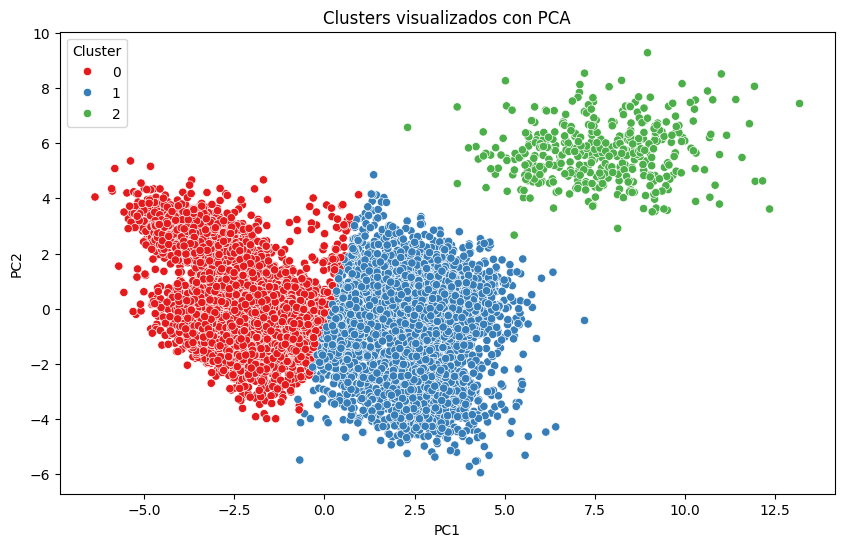

In [40]:
# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train)

# Crear un DataFrame con los datos transformados
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y_pred

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters visualizados con PCA')
plt.show()

## 5. Conclusiones

## Resultados:

En este ejercicio se obtuvieron los siguientes resultados: 

Se pudo realizar el modelo de aprendizaje no supervisado con el dataset asignado, sobre cual trabajamos. Los primero fue estandarizar los datos para que los datos esten en una distribución uniforme, esto se aplica porque es una buena práctica en estos modelos, luego se realizo el PCA para reducir la dimensionalidad de los datos. 

Después aplciamos el método de silueta para obtener un valor óptimo de k clusters, en este caso se obtuvo un valor de k = 3, luego se generó el modelo con k clusters, se obtuvo un valor de 0.4025, este valor es el score de silueta, este valor se obtiene al comparar los datos con el modelo generado. Tabién aplicamos el método del codo por lo que no varia mucho su valor, en este caso se obtuvo un valor de 0.4025.

Ya con los números de clusters definidos pudimos aplicar el modelo de aprendizaje no supervizado, realizando el algoritmo de Mkameans para obtener los centroides de los clusters.

Por concluido pudimos entrenar el modelo y calcular 3 etiquetas asignados a cada clusters. 